In [266]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [267]:
df = pd.read_csv("covid.csv")
cases_df = df[['Date_reported', 'New_cases']].loc[df['Country'] == 'Poland'].rename(columns = {"Date_reported" : "Date", "New_cases" : "Cases"})
cases_df.head(100)

,Date,Cases
83333,2020-01-03,0
83334,2020-01-04,0
83335,2020-01-05,0
83336,2020-01-06,0
83337,2020-01-07,0
...,...,...
83428,2020-04-07,311
83429,2020-04-08,435
83430,2020-04-09,357
83431,2020-04-10,370


<AxesSubplot:xlabel='Date'>

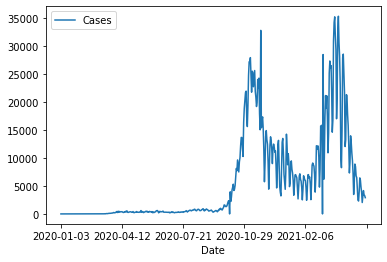

In [268]:
cases_df.plot(x = 'Date', y = 'Cases')

In [269]:
def format(cell):
	cell = str(cell)
	return cell if len(cell) == 2 else '0' + cell

df = pd.read_csv("meteo.csv")
df = df.iloc[:, 2: 6]
df.columns = ['Year', 'Month', 'Day', 'Temperature']
df['Month'] = df['Month'].apply(format)
df['Day'] = df['Day'] + 1 
df['Day'] = df['Day'].apply(format)
df['Date'] = df["Year"].astype(str) + '-' + df["Month"].astype(str) + '-' + df["Day"].astype(str)
meteo_df = df[['Date', 'Temperature']]
meteo_df.head(100)

,Date,Temperature
0,2020-01-03,6.1
1,2020-01-04,2.6
2,2020-01-05,4.2
3,2020-01-06,2.3
4,2020-01-07,-0.2
...,...,...
95,2020-04-07,18.9
96,2020-04-08,20.2
97,2020-04-09,20.6
98,2020-04-10,22.0


<AxesSubplot:xlabel='Date'>

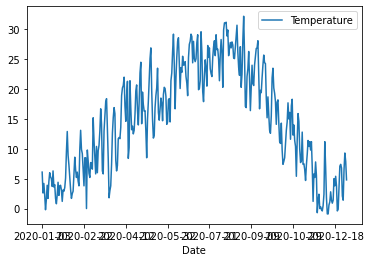

In [270]:
meteo_df.plot(x = 'Date', y = 'Temperature')

In [271]:
merge_df = pd.merge(meteo_df.head(364), cases_df.head(364), on='Date')
merge_df['Temperature'] /= np.std(merge_df['Temperature'])
merge_df['Cases'] /= np.std(merge_df['Cases'])

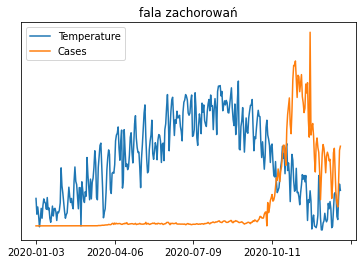

In [272]:
plt.plot(merge_df['Date'], merge_df['Temperature'])
plt.plot(merge_df['Date'], merge_df['Cases'])
plt.xticks(np.linspace(0, 364, 5))
plt.yticks([])
plt.legend(['Temperature', 'Cases'])
plt.title("fala zachorowań")
plt.show()

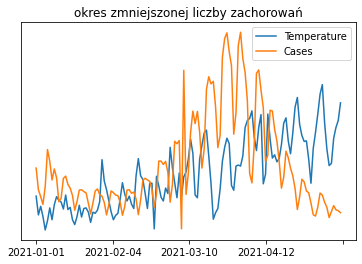

In [273]:
cases_df = cases_df.iloc[364:].copy()
cases_df['Cases'] /= np.std(cases_df['Cases'])
mx = len(cases_df)


plt.plot(cases_df['Date'], merge_df['Temperature'].iloc[:mx])
plt.plot(cases_df['Date'], cases_df['Cases'])
plt.xticks(np.linspace(0, mx, 5))
plt.yticks([])
plt.legend(['Temperature', 'Cases'])
plt.title("okres zmniejszonej liczby zachorowań")
plt.show()